# Data analysis on the Indian start-up ecosysytem

## Business Understanding
**Objective:** The primary objective is to venture into the Indian start-up ecosystem. This involves understanding the landscape of start-ups in India, their funding patterns, and the key players in the ecosystem (both start-ups and investors).

**Problem Definition:** The problem can be defined as analyzing the funding received by Indian start-ups from 2018 to 2021. This involves understanding the trends in funding, identifying the sectors or industries that are attracting the most investment, and recognizing the major investors in the ecosystem.

**Data Understanding:** The data that will be used for this analysis includes details of the start-ups, the funding amounts they received, and information about the investors. This data will be provided separately for each year from 2018 to 2021 via three different sources.

**Plan:** The preliminary plan would involve cleaning and preprocessing the data, conducting exploratory data analysis to understand trends and patterns, and possibly building predictive models to forecast future trends in the start-up ecosystem.

**Success Criteria:** The success of this project could be measured by the team’s ability to gain insights that help in making informed decisions about venturing into the Indian start-up ecosystem. This could involve identifying promising sectors, understanding the competitive landscape, and recognizing potential investment opportunities.

## Data Understanding


### Setup:

### Importation
Here is the section to import all the packages/libraries that will be used through the notebook

In [1]:
# Import all the necessary packages

import pyodbc     
from dotenv import dotenv_values   
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings


warnings.filterwarnings('ignore')

### Data Loading
Here is the section to load the dataset

In [2]:
# Load from GitHub repository source

# URL of the raw csv file in the GitHub repository
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'

# Use pandas to load the csv file
data_2018 = pd.read_csv(url)

In [3]:
# Display head
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
# Add year column
Year = 2018
data_2018['Year'] = Year

In [5]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [6]:
data_2018.shape

(526, 7)

In [7]:
# Load from OneDrive source

# Use pandas to load the csv file
data_2019 = pd.read_csv('C:/Users/USER/Desktop/LP1/startup_funding2019.csv')

# Display head
data_2019.head() 

,Unnamed: 0,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [8]:
# Add year column

Year = 2019
data_2019['Year'] = Year

In [9]:
data_2019.shape

(89, 11)

In [10]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     89 non-null     int64  
 1   Company/Brand  89 non-null     object 
 2   Founded        60 non-null     float64
 3   HeadQuarter    70 non-null     object 
 4   Sector         84 non-null     object 
 5   What it does   89 non-null     object 
 6   Founders       86 non-null     object 
 7   Investor       89 non-null     object 
 8   Amount($)      89 non-null     object 
 9   Stage          43 non-null     object 
 10  Year           89 non-null     int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 7.8+ KB


In [11]:
# Load from SQL Database source

# Load environment variables from .env file into a dictionary
environment_variables  = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [12]:

# Your connection string
connection_string = f"Driver={{SQL Server}}; SERVER={server}; DATABASE={database}; UID={username}; PWD={password}"

# Create a new connection
connection = pyodbc.connect(connection_string)

# Now you can use `connection` to interact with your database


In [13]:
# Create a connection string

connection_string = f"Driver={{SQL Server}}; SERVER={server}; DATABASE={database}; UID={username}; PWD={password}"

In [14]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [15]:
# SQL query to extract the data from Table1 
query_2020 = "SELECT * from dbo.LP1_startup_funding2020"
 
 # Execute the SQL query to load data from Table1 into pandas Dataframe
data_2020= pd.read_sql(query_2020, connection)

 # SQL query to extract the data from Table2
query_2021 = "SELECT * from dbo.LP1_startup_funding2021"

 # Execute the SQL query to load data from Table2 into pandas Dataframe
data_2021 = pd.read_sql(query_2021, connection)

In [16]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [17]:
# Add year column

Year = 2020
data_2020['Year'] = Year

In [18]:
data_2020.shape

(1055, 11)

In [19]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  Year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [20]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [21]:
# Add year column

Year = 2021
data_2021['Year'] = Year

In [22]:
data_2021.shape

(1209, 10)

In [23]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


### Observations

- Missing Values: Some columns may have missing or null values.
- Inconsistent Data Types: A column that should have a specific data type (like integer or string) might have different data types.
- Outliers: Some columns may contain outlier values that are significantly higher or lower than the rest.
- Duplicate Rows: There may be rows that are repeated in the dataset.
- Inaccurate Data: Some data may be inaccurate or entered incorrectly. For example, a person’s age might be listed as 200.
- Irrelevant Data: The dataset may contain data that is not relevant or necessary for your analysis.

### Action Plan
- Understand the Dataset: Familiarize yourself with the dataset. Understand what each column represents, the data types of each column, and how the data is structured.
- Define the Objective: Clearly define what you want to achieve from the analysis of the dataset. This will help you identify which data is relevant.
- Identify the Issues: Look for common data issues such as missing values, inconsistent data types, outliers, duplicate rows, inaccurate data, and irrelevant data. This can be done by visual inspection or by using functions that summarize the dataset.
- Plan Your Cleaning Process: Based on the issues identified, plan how to clean the data. This could involve deciding on how to handle missing data, whether to remove outliers, how to deal with duplicate or irrelevant data, etc.
- Backup the Dataset: Always make a copy of the original dataset before cleaning. 


### Hypothesis Test

*Null Hypothesis (H0):* The location of a start-up in India does not significantly affect the amount of funding it receives.

*Alternative Hypothesis (H1):* The location of a start-up in India significantly affect the amount of funding it receives.





### Questions

1 - How has the funding trend for Indian start-ups changed from 2018 to 2021? Are there any noticeable patterns or trends?

2 - Which sectors or industries received the most funding? Are there any sectors that are emerging as new favorites for investors?

3 - Who are the major investors in the Indian start-up ecosystem? Are there any investors who are particularly active or influential?

4 - Are there any specific cities or regions in India that are attracting more start-ups or funding?

5 - Is there a correlation between the size of the start-up (in terms of employees or customers) and the amount of funding received?

6 - Which start-ups have shown the most growth in terms of funding received over the years?

7 - Is there a correlation between the amount of funding received and the success of the start-up?

8 - Can we identify common investment strategies among the major investors?

## Data Preprocessing

In [24]:
# We are renaming the columns in the dataframe 'data_2018'
data_2018.rename(
    columns={
        'Company Name': 'Company_Brand',  # Changing 'Company Name' to 'Company_Brand'
        'Industry': 'Sector',  # Changing 'Industry' to 'Sector'
        'Round/Series': 'Stage',  # Changing 'Round/Series' to 'Stage'
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
        'Location': 'HeadQuarter',  # Changing 'Location' to 'HeadQuarter'
        'About Company': 'What_it_does'  # Changing 'About Company' to 'What_it_does'
        # Add more column changes as needed
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [25]:
# We are renaming the columns in the dataframe 'data_2019'
data_2019.rename(
    columns={
        'Company/Brand': 'Company_Brand',  # Changing 'Company Name' to 'Company_Brand'
        'What it does': 'What_it_does'  # Changing 'About Company' to 'What_it_does'
        # Add more column changes as needed
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [26]:
# We are renaming the columns in the dataframe 'data_2020'
data_2020.rename(
    columns={
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
    },
    inplace=True  # This will modify 'dat_3' directly
)


In [27]:
# We are renaming the columns in the dataframe 'data_2021'
data_2021.rename(
    columns={
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [28]:
data_2018.head()

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [29]:
data_2019.head()

,Unnamed: 0,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
0,0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [30]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,column10,Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [31]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [32]:
# Concatenate data into a single Dataframe

concatenated_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)

In [33]:
concatenated_data.to_csv("Indian_start-ups.csv")

In [34]:
df = pd.read_csv("Indian_start-ups.csv")

In [35]:
df.head()

,Unnamed: 0.1,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Unnamed: 0,Founded,Founders,Investor,column10
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN,NaN
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN,NaN
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN,NaN
3,3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN,NaN
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,NaN


In [36]:
df.shape

(2879, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   2879 non-null   int64  
 1   Company_Brand  2879 non-null   object 
 2   Sector         2861 non-null   object 
 3   Stage          1941 non-null   object 
 4   Amount($)      2622 non-null   object 
 5   HeadQuarter    2765 non-null   object 
 6   What_it_does   2879 non-null   object 
 7   Year           2879 non-null   int64  
 8   Unnamed: 0     89 non-null     float64
 9   Founded        2110 non-null   float64
 10  Founders       2334 non-null   object 
 11  Investor       2253 non-null   object 
 12  column10       2 non-null      object 
dtypes: float64(2), int64(2), object(9)
memory usage: 292.5+ KB


In [38]:
# Check column names
df.columns

Index(['Unnamed: 0.1', 'Company_Brand', 'Sector', 'Stage', 'Amount($)',
       'HeadQuarter', 'What_it_does', 'Year', 'Unnamed: 0', 'Founded',
       'Founders', 'Investor', 'column10'],
      dtype='object')

In [39]:
# Check Null Values
df.isnull().any()

Unnamed: 0.1     False
Company_Brand    False
Sector            True
Stage             True
Amount($)         True
HeadQuarter       True
What_it_does     False
Year             False
Unnamed: 0        True
Founded           True
Founders          True
Investor          True
column10          True
dtype: bool

In [40]:
df.isnull().sum()

Unnamed: 0.1        0
Company_Brand       0
Sector             18
Stage             938
Amount($)         257
HeadQuarter       114
What_it_does        0
Year                0
Unnamed: 0       2790
Founded           769
Founders          545
Investor          626
column10         2877
dtype: int64

In [41]:
# Check for duplicated values
df.duplicated().sum()

0

# Data Cleaning

Remove '#REF!' in random column values from concatenated data


In [42]:
# Function to remove '#REF!' from all columns
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', "")
    return value

# Apply the function to all columns
df = df.applymap(remove_ref) # element-wise


Replace 'None' string values with NaN element-wise allowing for consistent
representation of missing values

In [43]:
# Function replace None with NaN
def replace_none(value):
    if isinstance(value, str) and (value.lower() == 'none' or value. lower() == 'nan'):
        value = np.nan

    return value

# Apply the function to all columns
df = df.applymap(replace_none) # element-wise

If a value in stage column is a website link, its correct value is NaN

Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChlHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593

In [44]:
# display duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2874    False
2875    False
2876    False
2877    False
2878    False
Length: 2879, dtype: bool

In [45]:
# Drop duplicates
df = df.drop_duplicates()
df.head()

,Unnamed: 0.1,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Unnamed: 0,Founded,Founders,Investor,column10
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN,NaN
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN,NaN
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN,NaN
3,3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN,NaN
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN,NaN


Decision to drop column10 was due to the column having only two(2) non-null values and a couple of repeated values from the Stage column

In [46]:
df = df.drop(columns=['column10', 'Unnamed: 0.1', 'Unnamed: 0'])


In [47]:
# Disply head 
df.head()

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN


### Clean Company Brand column

In [48]:
df['Company_Brand']

0       TheCollegeFever
1       Happy Cow Dairy
2            MyLoanCare
3           PayMe India
4              Eunimart
             ...       
2874           Gigforce
2875             Vahdam
2876       Leap Finance
2877       CollegeDekho
2878             WeRize
Name: Company_Brand, Length: 2879, dtype: object

In [49]:
# Remove leading and trailing characters and replace text with some other text
df['Company_Brand'] = df['Company_Brand'].str.strip()
df['Company_Brand'] = df['Company_Brand'].str.replace('[^\w\s]','')
df['Company_Brand'] = df['Company_Brand'].str.replace('\s+', ' ')


In [50]:
df

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


### Clean Sector column

In [51]:
# Remove leading and trailing characters and replace text with some other text
df['Sector'] = df['Sector'].str.strip()
df['Sector'] = df['Sector'].str.replace('[^\w\s]','')
df['Sector'] = df['Sector'].str.replace('\s+', ' ')


In [52]:
# Replaces any missing values in the 'Sector' column with 'Unknown'
df['Sector'] = df['Sector'].fillna('Others')


In [53]:
# This code returns all unique values in the 'Sector' column.
df['Sector'].unique()


array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [54]:
# This code standardizes sector names in a DataFrame based on certain keywords.
import re

def standardize_sectors(sector):
    if re.search('finance|banking|insurance|fintech|Financial Services|Financial Technology|Mobile Payments', sector, re.IGNORECASE):
        return 'Finance'
    elif re.search('agriculture|farming|fish|milk|diary|dairy|dairy startup', sector, re.IGNORECASE):
        return 'Agriculture'
    elif re.search('education|edtech|E-commerce', sector, re.IGNORECASE):
        return 'Education'
    elif re.search('Healthcare Services|Hospital|Medical|Pharmaceutical|Nutrition|Diagnostics|Fitness|Public Safety|Health Tech|Wellness', sector, re.IGNORECASE):
        return 'Healthcare'
    elif re.search('Home|Decor|Interior Design|Interior|Smart Home|Renovation', sector, re.IGNORECASE):
        return 'RealEstate'
    elif re.search('Retail|E-commerce', sector, re.IGNORECASE):
        return 'Retail'
    elif re.search('Aviation|Aerospace', sector, re.IGNORECASE):
        return 'Aviation'
    elif re.search('Energy|Renewable Energy|Clean Energy|Solar|', sector, re.IGNORECASE):
        return 'Energy'
    elif re.search('Internet|Information|Messaging|Personalization|Test and Measurement|Technology|CleanTech|Mobile|Apps|Developer|Cloud|Artififial|PaaS|SaaS', sector, re.IGNORECASE):
        return 'IT'
    elif re.search('Marketing|Promotion|Event|Market', sector, re.IGNORECASE):
        return 'Marketing'
    elif re.search('Consumer|Food|Beverage|Tea|Snack', sector, re.IGNORECASE):
        return 'Consumables'
    elif re.search('Media and Entertainment|News|Outdoors|Sports|Product studio|Broadcasting|Media and Entertainment|Music|Music Streaming|Video|Video Streaming', sector, re.IGNORECASE):
        return 'Media and Entertainment'
    elif re.search("Men's|Shoes|Fashion|Laundry and Dry-cleaning", sector, re.IGNORECASE):
        return 'Lifestyle'
    elif re.search('Coworking|Incubators|Recruiting|Staffing|Consulting', sector, re.IGNORECASE):
        return 'HR'
    elif re.search('Automotive|Auto|Engine|Automotion', sector, re.IGNORECASE):
        return 'Automotive'
    elif re.search('Logistics|Transportation|Travel|Freight|Supply Chain', sector, re.IGNORECASE):
        return 'Logistics'
    elif re.search('Others', sector, re.IGNORECASE):
        return 'Others'
    # Add more conditions here to handle other sectors
    else:
        return sector  # If no conditions match, return the original sector

# Apply the function to the Sector column
df['Sector'] = df['Sector'].apply(standardize_sectors)


In [55]:
# Display the updated DataFrame
df[df['Sector'] .isnull()]

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor


### Clean stage column

In [56]:
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed

If a value in stage column is a website link, its correct value is NaN

Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChlHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593

In [57]:
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'

    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [58]:
# Remove website link values from the stage column
df['Stage'] = df['Stage'].apply(remove_website_link)


If the 'stage' value is a number or contains $, the column 'what_it does' becomes its
old value concatenated with the value in the 'founder' column. The correct value for
'founder' is the 'investor' value and the correct value for 'investor' is the 'amount'
value and correct 'amount' becomes the old 'stage' value while the correct value for
'stage' is NaN or missing.

In [59]:
# Function to check if a value is numeric
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Identify rows where 'Stage' value is numeric
mask = df['Stage'].apply(is_numeric)

# Update the 'What_it_does' column to its concatenation with 'Founders' value
old_What_it_does = df.loc[mask, 'What_it_does']
old_Founders = df.loc[mask, 'Founders']

df.loc[mask, 'What_it_does'] = old_What_it_does.fillna('') + ' ' + old_Founders.fillna('')

# Update 'Founders' column using the old 'Investor' value
df.loc[mask, 'Founders'] = df.loc[mask, 'Investor']

# Update 'Investor' column using the old 'Amount($)' value
df.loc[mask, 'Investor'] = df.loc[mask, 'Amount($)']

# Update 'Amount($)' column using the old 'Stage' value
df.loc[mask, 'Amount($)'] = df.loc[mask, 'Stage']

# Set 'Stage' to NaN
df.loc[mask, 'Stage'] = np.nan


In [60]:
# Replaces any missing values in the 'Stage' column with 'Unknown'
df['Stage'] = df['Stage'].fillna('Unknown')

In [61]:
# Display rows where the 'Stage' column contains NaN values
df[pd.isna(df['Stage'])]

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor


In [62]:
df

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor
0,TheCollegeFever,Energy,Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,Finance,Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,Finance,Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,Education,Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Energy,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,Vahdam,Energy,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC
2876,Leap Finance,Finance,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,CollegeDekho,Education,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


### Clean Amount column

In [63]:
df['Amount($)'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [64]:
df['Amount($)'].nunique()

605

Convert rupees to dollars with the average exchange rate for 2018

In [65]:

# Function to convert a string to float
def floater(string):
    try:
        return float(string)
    except ValueError:
        return np.nan

# Function to clean amount values
def clean_amount(amount):
    if isinstance(amount, str):
        # Remove any spaces
        amount = amount.replace(' ', '')
        # Remove commas
        amount = amount.replace(',', '')

        if amount == '' or amount == '-':
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of 1 INR = 0.01461 USD
        elif '₹' in amount:
            amount = amount.replace('₹', '' )
            amount = floater(amount) * 0.01461
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)

    return amount


If the investor value is a number or contains $, the correct value for amount if missing
is the investor value, the correct value for stage is the old amount value and the
investor value becomes NaN or missing


In [66]:
# Identify rows where 'investor' value is numeric using clean_amount function
mask = df['Investor'].apply(lambda x: pd.notna(clean_amount(x)))

# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = df['Stage'].isna()
df.loc[mask & stage_mask, 'Stage'] = df.loc[mask, 'Amount($)']

# Update 'amount' column with 'investor' value
df.loc[mask, 'Amount($)'] = df.loc[mask, 'Investor']

# Set 'investor' to NaN
df.loc[mask, 'Investor'] = np.nan


Clean and convert amounts to USD 



In [67]:
# Clean and convert amounts to USD
df['Amount($)'] = [clean_amount(amount) for amount in df['Amount($)']]


Replace falsely unique values or actual duplicates in categorical and string columns
with their first occurence in the final_dataset

In [68]:
# Heuristic Function to replace actual duplicates with first occurrence
def replace_col_duplicates(column):
    """ 
        Replaces duplicates values (identified through some heuristics) in a column with their first occurrence
        Although the first occurrence might not be the best representation but it allows for consistency in values
        Although the first occurrence might not be the best representation but it allows for consistency in values
        
        Parameter: column
        Returns : column with consistent representation of values

    """
    actual_strings = {} # Dictionary to store the first occurrence of each modified string

    def replace_string(string):
        actual_string = re.sub(r'[^\w]', '', string).lower() if isinstance(string, str) else string # Replace all special characters including whitespaces
        if actual_string in actual_strings:
            return actual_strings[actual_string]
        else:
            actual_strings[actual_string] = string
            return string
    return column.apply(replace_string)

In [69]:
# Ensure the 'Amount' column is of type string
df['Amount($)'] = df['Amount($)'].astype(str)

df['Amount($)'] = df['Amount($)'].astype(float)

# Add a dollar sign to the start of each value in the 'Amount' column
df['Amount($)'] = df['Amount($)'].apply(lambda x: f"${x}")


In [70]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [71]:
df['Amount($)'] = df['Amount($)'].str.replace('$', '')
df['Amount($)'] = df['Amount($)'].str.replace(',', '')
df['Amount($)'] = df['Amount($)'].astype(float)


In [72]:
df[pd.isna(df['Amount($)'])]

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor
4,Eunimart,Education,Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
8,Freightwalla,Energy,Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018,NaN,NaN,NaN
9,Microchip Payments,Finance,Seed,NaN,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018,NaN,NaN,NaN
10,BizCrum Infotech Pvt. Ltd.,Energy,Seed,NaN,"Delhi, Delhi, India",Building Transactionary B2B Marketplaces,2018,NaN,NaN,NaN
11,Emojifi,Energy,Seed,NaN,"Bengaluru, Karnataka, India","Emojifi is an app that provides live emoji, st...",2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2818,Godamwale,Energy,Unknown,NaN,Mumbai,Godamwale is tech enabled integrated logistics...,2021,2016.00,1000000\t,Seed
2830,Atomberg Technologies,Energy,Unknown,NaN,Mumbai,A maker of energy-efficient smart fans Manoj M...,2021,2012.00,Ka Enterprises,$Undisclosed
2831,Genext Students,Education,Unknown,NaN,Mumbai,LIVE online classes with expert tutors for K-1...,2021,2013.00,Navneet Education,$Undisclosed
2836,OckyPocky,Education,Seed,NaN,Gurugram,OckyPocky is India's 1st interactive English l...,2021,2015.00,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund"


In [73]:

# df['Amount($)'] = df['Amount($)'].replace('—', np.nan)
# df['Amount($)'] = df['Amount($)'].str.replace('$', '')
# df['Amount($)'] = df['Amount($)'].str.replace('₹', '')
# df['Amount($)'] = df['Amount($)'].str.replace(',', '')
# df = df[df['Amount($)'] != 'Upsparks']

# #df['Amount($)'] = df['Amount($)'].replace('Undisclosed', np.nan)
# #df['Amount($)'] = pd.to_numeric(df['Amount($)'])


In [74]:
# df_upsparks = df[df['Amount($)'] == 'Undisclosed']
# df_upsparks

In [75]:
df


,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor
0,TheCollegeFever,Energy,Seed,250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,584400.00,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,Finance,Series A,949650.00,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,Finance,Angel,2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,Education,Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2874,Gigforce,Energy,Pre-series A,3000000.00,Gurugram,A gig/on-demand staffing company.,2021,2019.00,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,Vahdam,Energy,Series D,20000000.00,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.00,Bala Sarda,IIFL AMC
2876,Leap Finance,Finance,Series C,55000000.00,Bangalore,International education loans for high potenti...,2021,2019.00,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,CollegeDekho,Education,Series B,26000000.00,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.00,Ruchir Arora,"Winter Capital, ETS, Man Capital"


### Clean the HeadQuarter column 

In [76]:
df[["City", "Region", "Country"]]= df["HeadQuarter"].str.split(",", expand=True)

In [77]:
df.tail()

,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor,City,Region,Country
2874,Gigforce,Energy,Pre-series A,3000000.00,Gurugram,A gig/on-demand staffing company.,2021,2019.00,"Chirag Mittal, Anirudh Syal",Endiya Partners,Gurugram,None,None
2875,Vahdam,Energy,Series D,20000000.00,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.00,Bala Sarda,IIFL AMC,New Delhi,None,None
2876,Leap Finance,Finance,Series C,55000000.00,Bangalore,International education loans for high potenti...,2021,2019.00,"Arnav Kumar, Vaibhav Singh",Owl Ventures,Bangalore,None,None
2877,CollegeDekho,Education,Series B,26000000.00,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.00,Ruchir Arora,"Winter Capital, ETS, Man Capital",Gurugram,None,None
2878,WeRize,Finance,Series A,8000000.00,Bangalore,India’s first socially distributed full stack ...,2021,2019.00,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",Bangalore,None,None


In [78]:
df = df.drop(columns=['Region', 'Country'])


In [79]:
def move_column(df, col, pos):
    col_series = df[col]
    df.drop(columns=[col], inplace=True)
    df.insert(loc=pos, column=col, value=col_series)

move_column(df, 'City', 4)  # Moves 'my_column' to the first position


In [80]:
df.columns

Index(['Company_Brand', 'Sector', 'Stage', 'Amount($)', 'City', 'HeadQuarter',
       'What_it_does', 'Year', 'Founded', 'Founders', 'Investor'],
      dtype='object')

In [81]:
df[pd.isna(df['HeadQuarter'])]

,Company_Brand,Sector,Stage,Amount($),City,HeadQuarter,What_it_does,Year,Founded,Founders,Investor
526,Bombay Shaving,Energy,Unknown,6300000.00,NaN,NaN,Provides a range of male grooming products Sha...,2019,NaN,Sixth Sense Ventures,NaN
534,Quantiphi,Energy,Series A,20000000.00,NaN,NaN,It is an AI and big data services company prov...,2019,NaN,Renuka Ramnath,Multiples Alternate Asset Management
540,Open Secret,Energy,Unknown,NaN,NaN,NaN,It produces and sells top quality snacks Ahana...,2019,NaN,Matrix Partners,Undisclosed
542,Byju's,Education,Unknown,540000000.00,NaN,NaN,Provides online learning classes Byju Raveendran,2019,2011.00,"South Africa’s Naspers Ventures, the CPP Inves...",NaN
544,Witblox,Education,Unknown,182700.00,NaN,NaN,Offers a range of robotics learning tools Amit...,2019,2014.00,Mumbai Angels Network,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1656,Shiksha,Education,Unknown,181000.00,NaN,NaN,It makes college selection easy for students l...,2020,2008.00,Mumbai Angels Network,NaN
1660,XpressBees,Energy,Unknown,10000000.00,NaN,NaN,Provides end to end supply chain solutions Sup...,2020,2015.00,Alibaba,NaN
1662,Wealth Bucket,Finance,Unknown,3000000.00,NaN,NaN,An online platform for mutual fund investments...,2020,2018.00,"NorthStar, Vinod Khatumal",NaN
1666,EpiFi,Finance,Seed Round,13200000.00,NaN,NaN,It offers customers with a single interface fo...,2020,NaN,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital"


### Clean Year column

In [82]:
df['Year'].unique()


array([2018, 2019, 2020, 2021], dtype=int64)

In [83]:
# # Replace non-numeric values with NaN
# df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# df['Year'] = df['Year'].astype(int)


### Clean Founded column

In [84]:
df['Founded'].unique()


array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009.,
       1995., 2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [85]:
#df['Year'] = df['Year'].astype(str)
df['Founded'] = pd.to_datetime(df['Founded'], format='%Y', errors='coerce')
df['Founded'] = df['Founded'].dt.year


In [86]:
df.describe()

,Amount($),Year,Founded
count,2312.00,2879.00,2110.00
mean,121254276.40,2020.02,2016.08
std,3442955125.02,1.09,4.37
min,876.60,2018.00,1963.00
25%,1000000.00,2020.00,2015.00
50%,3000000.00,2020.00,2017.00
75%,12000000.00,2021.00,2019.00
max,150000000000.00,2021.00,2021.00


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount($),2312.00,121254276.40,3442955125.02,876.60,1000000.00,3000000.00,12000000.00,150000000000.00
Year,2879.00,2020.02,1.09,2018.00,2020.00,2020.00,2021.00,2021.00
Founded,2110.00,2016.08,4.37,1963.00,2015.00,2017.00,2019.00,2021.00


In [88]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,2879,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2879,8,Energy,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2879,75,Unknown,939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),2312.00,NaN,NaN,NaN,121254276.40,3442955125.02,876.60,1000000.00,3000000.00,12000000.00,150000000000.00
City,2765,132,Bangalore,866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeadQuarter,2765,172,Bangalore,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,2879,2763,Provides online learning classes Byju Raveendran,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2879.00,NaN,NaN,NaN,2020.02,1.09,2018.00,2020.00,2020.00,2021.00,2021.00
Founded,2110.00,NaN,NaN,NaN,2016.08,4.37,1963.00,2015.00,2017.00,2019.00,2021.00
Founders,2289,2031,Venture Catalysts,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'Amount($)'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Founded'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

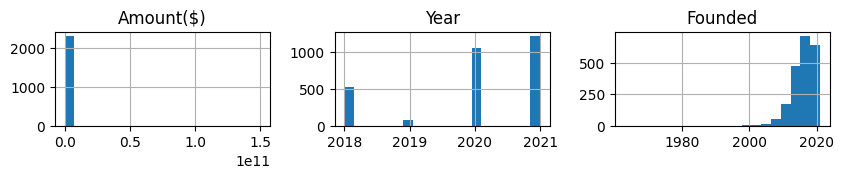

In [89]:
# Universal analysis
# Histogram for numeric variables

df.hist(
    figsize=(10,6),
    layout=(4,3),
    bins=20
    )

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Sector         2879 non-null   object 
 2   Stage          2879 non-null   object 
 3   Amount($)      2312 non-null   float64
 4   City           2765 non-null   object 
 5   HeadQuarter    2765 non-null   object 
 6   What_it_does   2879 non-null   object 
 7   Year           2879 non-null   int64  
 8   Founded        2110 non-null   float64
 9   Founders       2289 non-null   object 
 10  Investor       1445 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 247.5+ KB


# Hypothesis Testing

In [91]:
# First, let's separate the funding data based on location
grouped = df.groupby('City')['Amount($)']

# Create a list of Series
groups = [group for name, group in grouped]

# Perform ANOVA
stats, p = stats.f_oneway(*groups)

print('Statistics=%.3f, p=%.3f' % (stats, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Statistics=nan, p=nan
Different distributions (reject H0)


***Findings***

This suggests that the test was able to reject the null hypothesis (H0), indicating that there are significant differences between the groups.

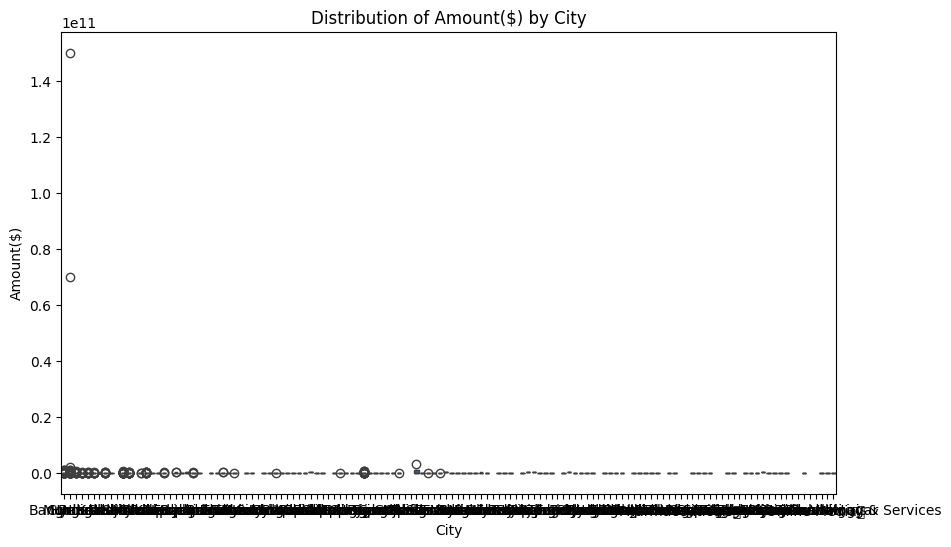

In [92]:


# Create a boxplot
plt.figure(figsize=(10, 6))  # Adjust the size of your plot as necessary
sns.boxplot(x='City', y='Amount($)', data=df)

plt.title('Distribution of Amount($) by City')
plt.show()


In [93]:
# # Plot a histogram
# sns.histplot(df = df, x = "Amount($)", hue ="City", kde= True )

# Exploratory Data Analysis (EDA)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Sector         2879 non-null   object 
 2   Stage          2879 non-null   object 
 3   Amount($)      2312 non-null   float64
 4   City           2765 non-null   object 
 5   HeadQuarter    2765 non-null   object 
 6   What_it_does   2879 non-null   object 
 7   Year           2879 non-null   int64  
 8   Founded        2110 non-null   float64
 9   Founders       2289 non-null   object 
 10  Investor       1445 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 247.5+ KB


Univariate Analysis

In [95]:
df.describe()

,Amount($),Year,Founded
count,2312.00,2879.00,2110.00
mean,121254276.40,2020.02,2016.08
std,3442955125.02,1.09,4.37
min,876.60,2018.00,1963.00
25%,1000000.00,2020.00,2015.00
50%,3000000.00,2020.00,2017.00
75%,12000000.00,2021.00,2019.00
max,150000000000.00,2021.00,2021.00


In [96]:
df.isnull().sum()

Company_Brand       0
Sector              0
Stage               0
Amount($)         567
City              114
HeadQuarter       114
What_it_does        0
Year                0
Founded           769
Founders          590
Investor         1434
dtype: int64

In [97]:
df.nunique()


Company_Brand    2214
Sector              8
Stage              75
Amount($)         507
City              132
HeadQuarter       172
What_it_does     2763
Year                4
Founded            34
Founders         2031
Investor         1112
dtype: int64

In [98]:
df.nunique().sum()


9052

In [99]:
df.sort_values(by='Amount($)', ascending=True).head()

,Company_Brand,Sector,Stage,Amount($),City,HeadQuarter,What_it_does,Year,Founded,Founders,Investor
70,Ultraviolette Automotive,Energy,Series A,876.60,Bangalore,"Bangalore, Karnataka, India",Ultraviolette is a startup working on electric...,2018,NaN,NaN,NaN
98,Next Digital Solutions,Energy,Angel,1461.00,Kota,"Kota, Rajasthan, India",Next Digital Solutions is website design & Dig...,2018,NaN,NaN,NaN
164,Classworks India,Education,Undisclosed,1461.00,Chennai,"Chennai, Tamil Nadu, India","Saas, Web App, Mobile App, School Education",2018,NaN,NaN,NaN
258,ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED,Energy,Seed,2922.00,Pune,"Pune, Maharashtra, India",Digital Marketing Agency,2018,NaN,NaN,NaN
19,Antariksh Waste Ventures Pvt ltd,Energy,Seed,7305.00,Chennai,"Chennai, Tamil Nadu, India",Waste Management for Smart Cities,2018,NaN,NaN,NaN


In [100]:
df.sort_values(by='Amount($)', ascending=False).head()

,Company_Brand,Sector,Stage,Amount($),City,HeadQuarter,What_it_does,Year,Founded,Founders,Investor
1743,Alteria Capital,Finance,Debt,150000000000.00,Mumbai,Mumbai,Alteria Capital is a Venture debt firm .,2021,2018.00,Vinod Murali,NaN
895,Reliance Retail Ventures Ltd,Retail,Unknown,70000000000.00,Mumbai,Mumbai,Reliance Retail offers online shopping and a c...,2020,2006.00,"Silver Lake, Mubadala Investment Company",NaN
932,Snowflake,Energy,Unknown,3000000000.00,California,California,Snowflake is a cloud data platform that provid...,2020,2012.00,"Salesforce Ventures, Dragoneer Investment Group",NaN
943,Reliance,Energy,Unknown,2200000000.00,Mumbai,Mumbai,Reliance owns businesses across India engaged ...,2020,1973.00,"Facebook, Google, KKR, Silver Lake",NaN
2016,VerSe Innovation,Energy,Series H,1000000000.00,Bangalore,Bangalore,Owner of Dailyhunt App and I-Pay,2021,2007.00,Virendra Gupta,"Canaan Valley Capital, Glade Brook Capital Par..."


In [101]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation
correlation = numeric_df.corr()
correlation

,Amount($),Year,Founded
Amount($),1.00,0.02,-0.02
Year,0.02,1.00,0.15
Founded,-0.02,0.15,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

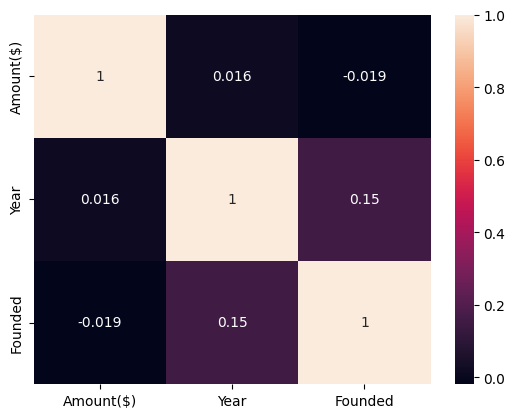

In [102]:
sns.heatmap(correlation, annot=True)

plt.show

In [103]:
df.select_dtypes(include=[np.number]).mean()


Amount($)   121254276.40
Year             2020.02
Founded          2016.08
dtype: float64

In [104]:
df.select_dtypes(include='number')

,Amount($),Year,Founded
0,250000.00,2018,NaN
1,584400.00,2018,NaN
2,949650.00,2018,NaN
3,2000000.00,2018,NaN
4,NaN,2018,NaN
...,...,...,...
2874,3000000.00,2021,2019.00
2875,20000000.00,2021,2015.00
2876,55000000.00,2021,2019.00
2877,26000000.00,2021,2015.00


Distribution of Numeric Columns:

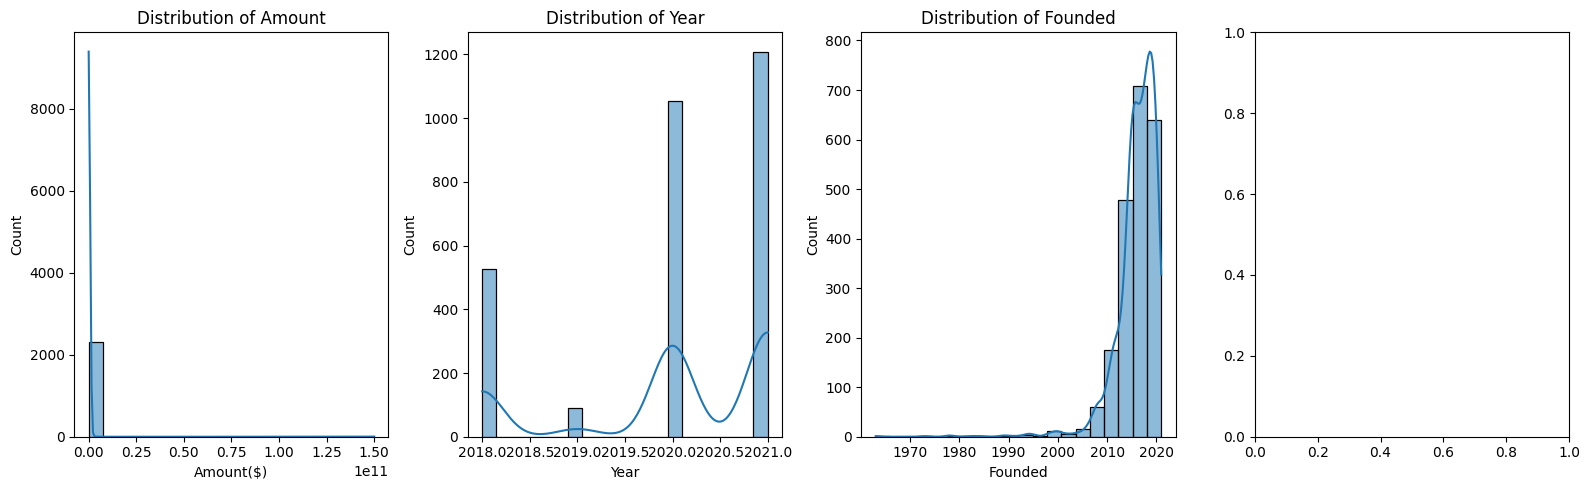

In [105]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

# Distribution of 'Amount' column
sns.histplot(df['Amount($)'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Amount')

# Distribution of 'Year' column
sns.histplot(df['Year'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Year')

# Distribution of 'Founded' column
sns.histplot(df['Founded'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Founded')

plt.tight_layout()
plt.show()

In [106]:
df.select_dtypes(include='object')

,Company_Brand,Sector,Stage,City,HeadQuarter,What_it_does,Founders,Investor
0,TheCollegeFever,Energy,Seed,Bangalore,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN
2,MyLoanCare,Finance,Series A,Gurgaon,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN
3,PayMe India,Finance,Angel,Noida,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN
4,Eunimart,Education,Seed,Hyderabad,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN
...,...,...,...,...,...,...,...,...
2874,Gigforce,Energy,Pre-series A,Gurugram,Gurugram,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,Vahdam,Energy,Series D,New Delhi,New Delhi,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC
2876,Leap Finance,Finance,Series C,Bangalore,Bangalore,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,CollegeDekho,Education,Series B,Gurugram,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital"


Univariate analysis 

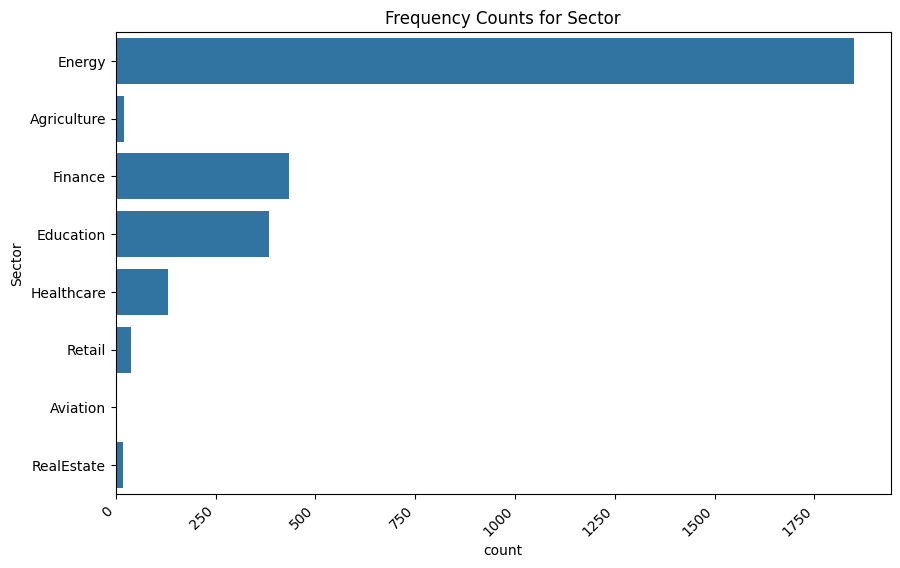

In [107]:
# Univariate analysis for categorical columns
categorical_columns = ['Sector']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[column])
    plt.title(f'Frequency Counts for {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

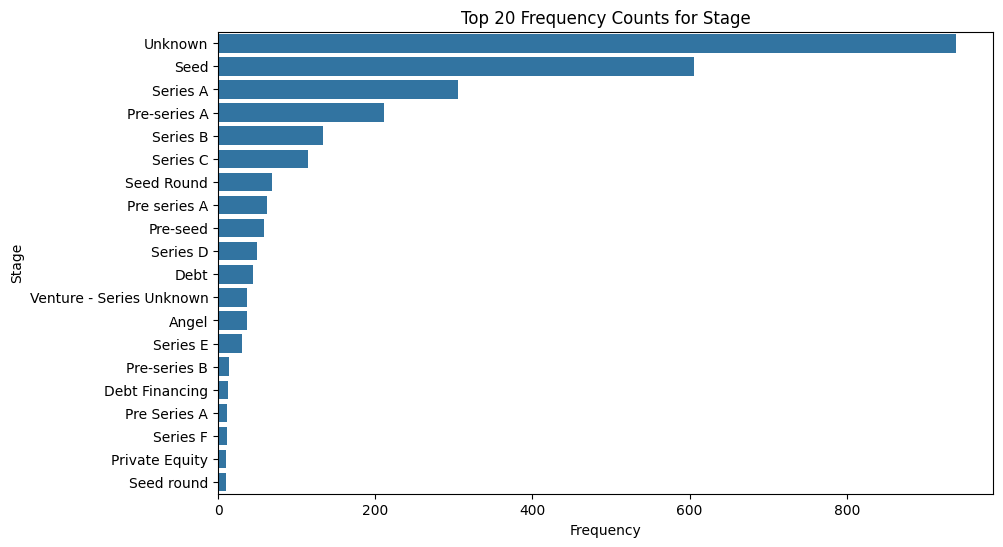

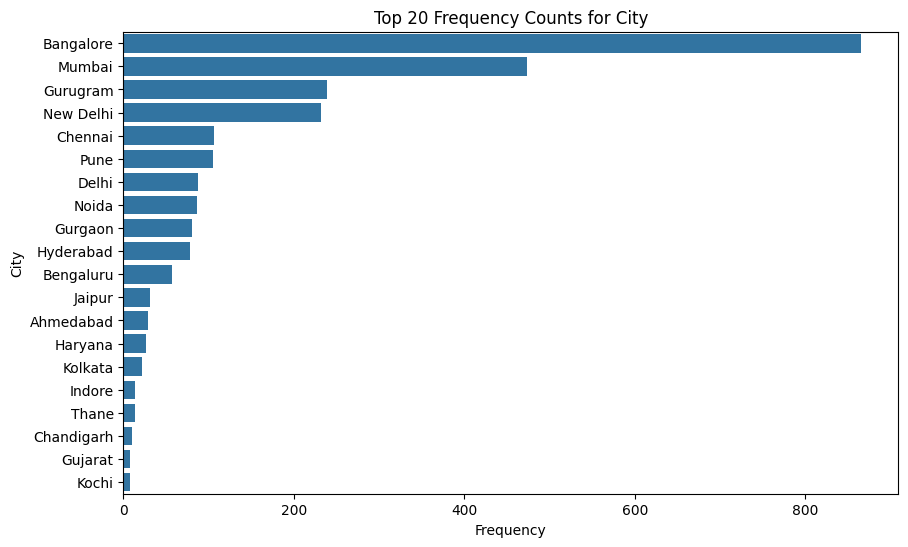

In [108]:
# Univariate analysis for categorical columns
categorical_columns = ['Stage', 'City']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=column, order=df[column].value_counts().iloc[:20].index)
    plt.title(f'Top 20 Frequency Counts for {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()

Multivariate Analysis

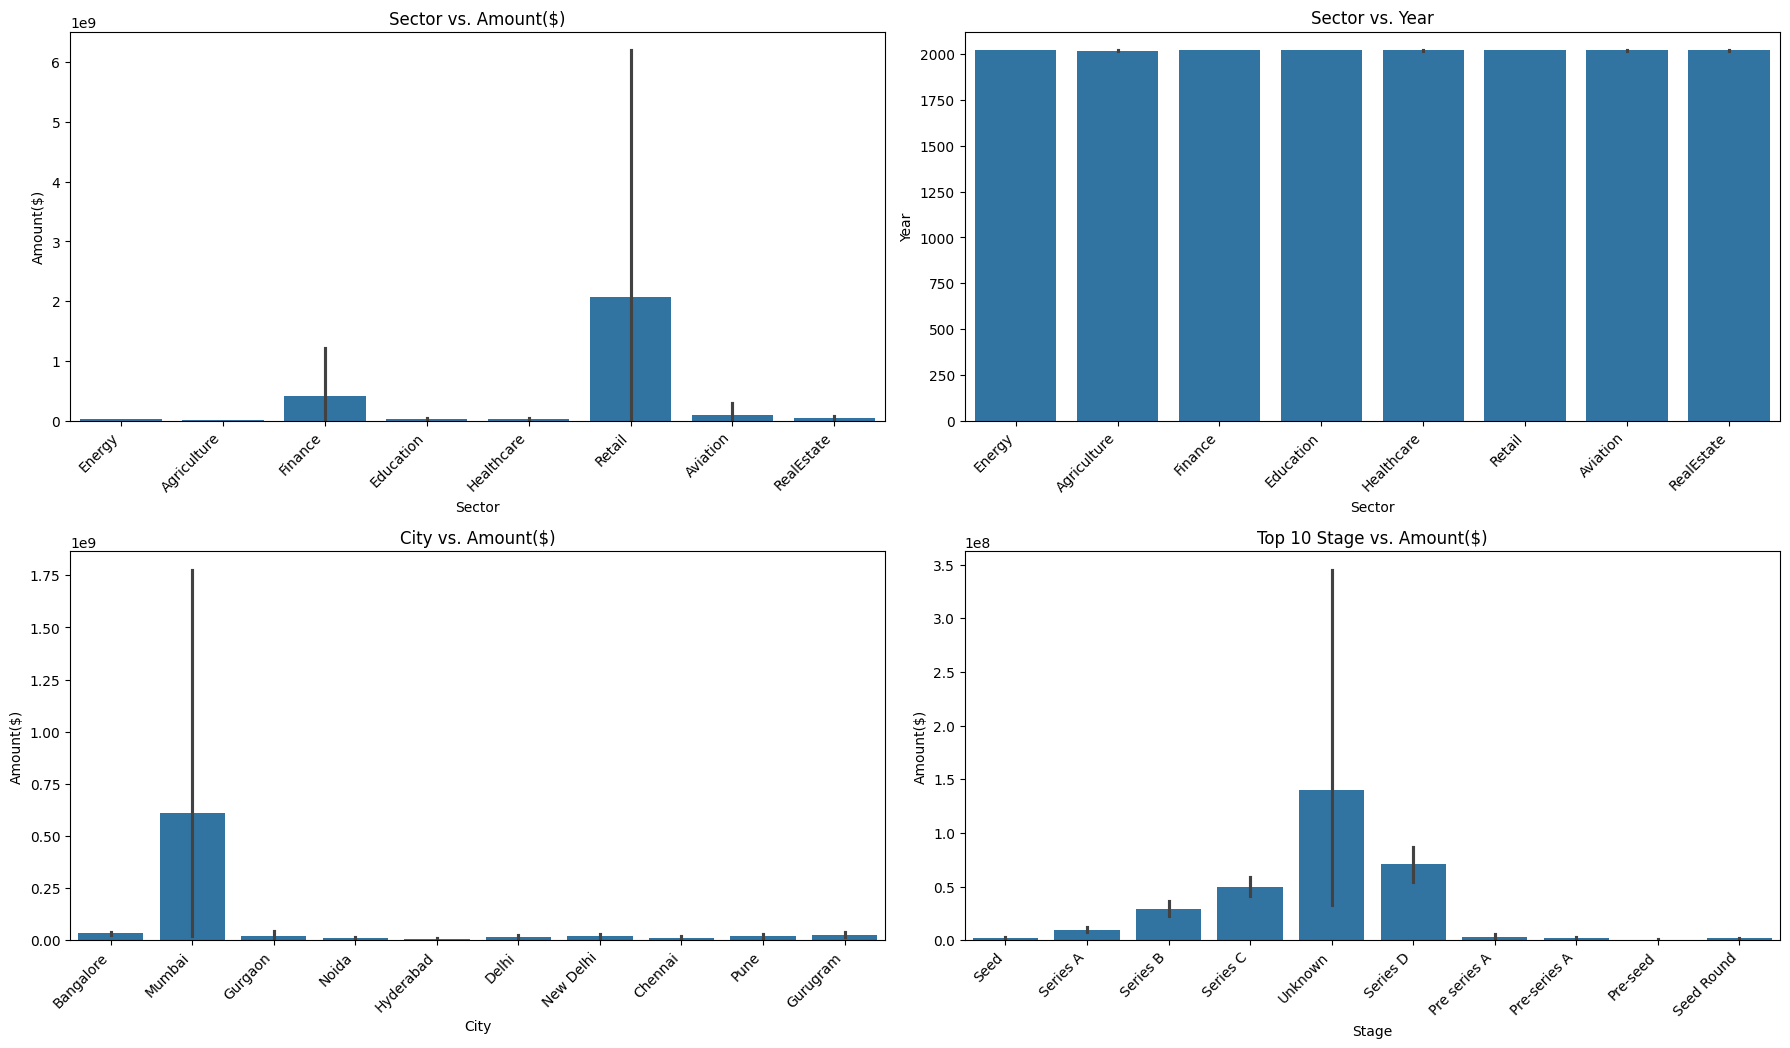

In [109]:

# Categorical vs. Numerical
plt.figure(figsize=(18, 20))

# Adjust vertical space between subplots
plt.subplots_adjust(hspace=0.5)

# Categorical: Main Sector vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 1)
top_10_main_sector = df['Sector'].value_counts().head(10).index
sns.barplot(x='Sector', y='Amount($)', data=df[df['Sector'].isin(top_10_main_sector)])
plt.title('Sector vs. Amount($)')
plt.xticks(rotation=45, ha='right')   

# Categorical: Main Sector vs. Numerical: Years of Existence (Column Chart)
plt.subplot(4, 2, 2)
sns.barplot(x='Sector', y='Year', data=df[df['Sector'].isin(top_10_main_sector)])
plt.title('Sector vs. Year')
plt.xticks(rotation=45, ha='right')

# Categorical: Industry vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 3)
top_10_industry = df['City'].value_counts().head(10).index
sns.barplot(x='City', y='Amount($)', data=df[df['City'].isin(top_10_industry)])
plt.title('City vs. Amount($)')
plt.xticks(rotation=45, ha='right')  

# Categorical: Top 10 Stage vs. Numerical: Amount (Column Chart)
plt.subplot(4, 2, 4)
top_10_stage = df['Stage'].value_counts().head(10).index
sns.barplot(x='Stage', y='Amount($)', data=df[df['Stage'].isin(top_10_stage)])
plt.title('Top 10 Stage vs. Amount($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Numerical vs. Numerical

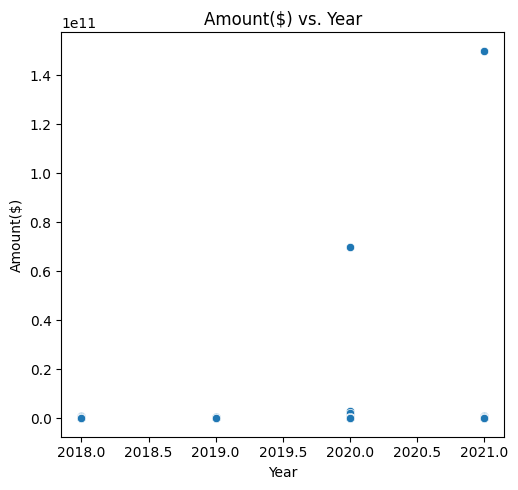

In [110]:
# Numerical vs. Numerical
plt.figure(figsize=(15, 5))

# Founded vs. Years of Existence
plt.subplot(1, 3, 3)
sns.scatterplot(x='Year', y='Amount($)', data=df)
plt.title('Amount($) vs. Year')

plt.tight_layout()
plt.show()

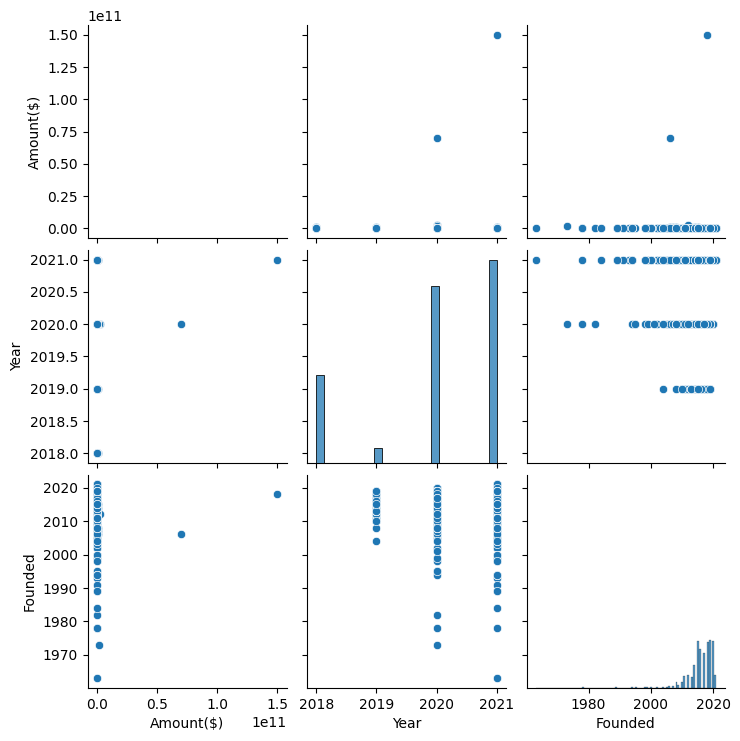

In [111]:
# Scatter Plots
# Create scatter plots for pairs of numeric variables
sns.pairplot(df[['Amount($)', 'Year', 'Founded']])
plt.show()

<Axes: >

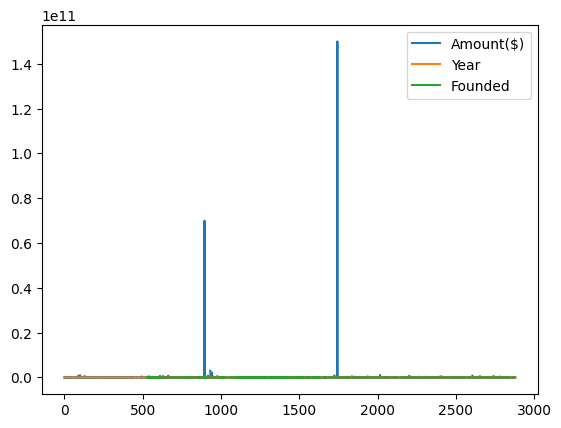

In [112]:
df.plot()

<Axes: >

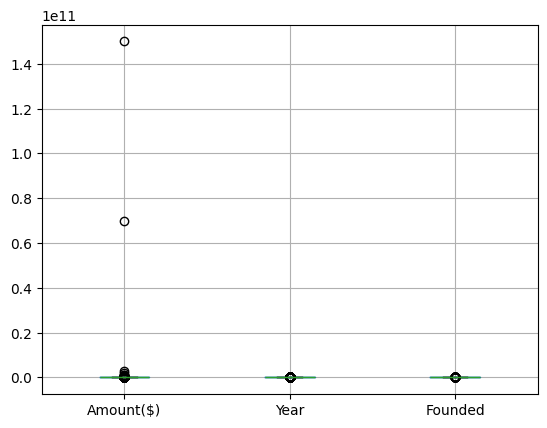

In [113]:
# Looking for outliers 
df.boxplot()

# Business Analysis Questions 

In [129]:
# import matplotlib.pyplot as plt

# # Hypothetical data
# years = df['Year']
# funding_amounts = df['Amount($)']
 

# plt.figure(figsize=(10, 5))
# plt.plot(years, funding_amounts, marker='o')

# plt.title('Funding Trends for Indian Start-ups (2018-2021)')
# plt.xlabel('Year')
# plt.ylabel('Funding Amount (in USD)')

# plt.grid(True)
# plt.show()


In [130]:
# import matplotlib.pyplot as plt

# # Hypothetical data
# years = [2018, 2019, 2020, 2021]
# funding_amounts = [100930, 150000, 200000, 241787]  # Replace with actual data

# plt.figure(figsize=(10, 5))
# plt.plot(years, funding_amounts, marker='o')

# plt.title('Funding Trends for Indian Start-ups (2018-2021)')
# plt.xlabel('Year')
# plt.ylabel('Funding Amount (in Crores)')

# plt.grid(True)
# plt.show()


In [131]:

# # Get a list of unique sectors
# sectors = df['Sector'].unique()

# plt.figure(figsize=(10, 5))

# # Create a line for each sector
# for sector in sectors:
#     sector_data = df[df['Sector'] == sector]
#     plt.plot(sector_data['Year'], sector_data['Amount($)'], marker='o', label=sector)

# plt.title('Funding Trends for Indian Start-ups by Sector (2018-2021)')
# plt.xlabel('Year')
# plt.ylabel('Funding Amount (in USD)')
# plt.legend()

# plt.grid(True)
# plt.show()


### ***Question 1*** - How has the funding trend for Indian start-ups changed from 2018 to 2021? 

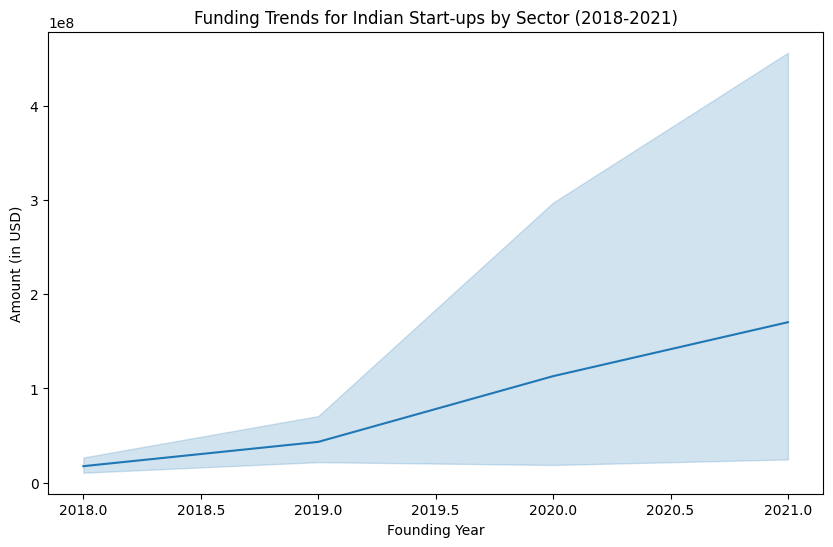

In [132]:
# Line plot showing funding trend over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Amount($)', data=df)
plt.title('Funding Trends for Indian Start-ups by Sector (2018-2021)')
plt.xlabel('Founding Year')
plt.ylabel('Amount (in USD)')
plt.show()

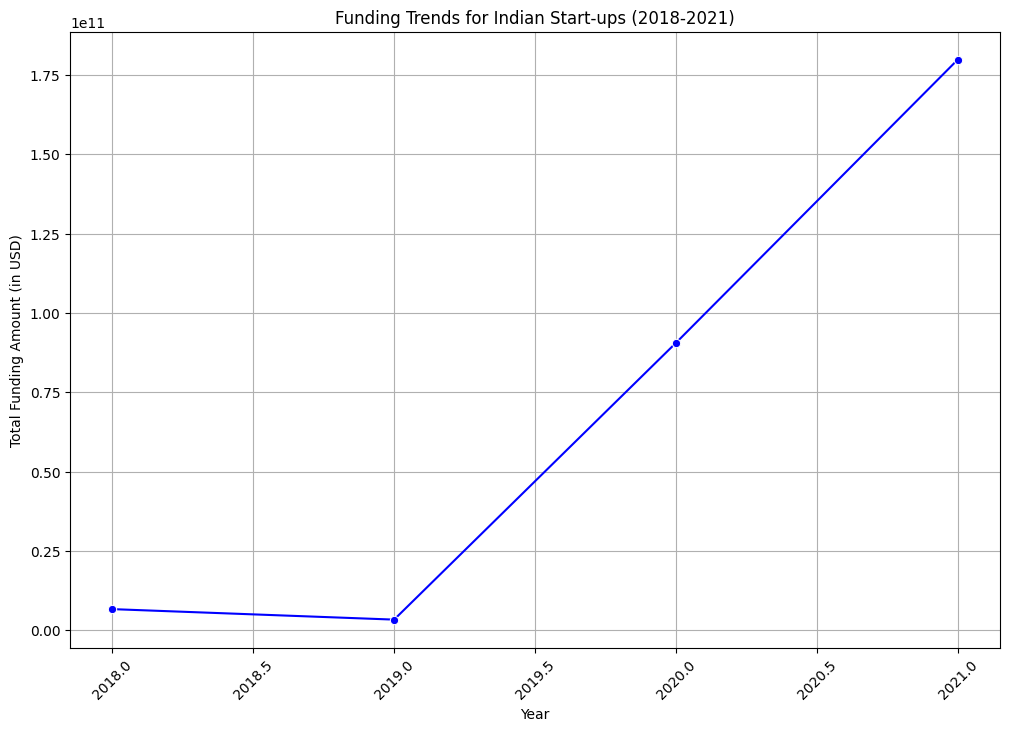

In [133]:

# Group the data by year and calculate the total funding amount for each year
funding_trend = df.groupby('Year')['Amount($)'].sum().reset_index()

# Plotting the funding trend over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Amount($)', data=funding_trend, marker='o', color='b')
plt.title('Funding Trends for Indian Start-ups (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### ***Question 2*** - Which sectors or industries received the most funding? 

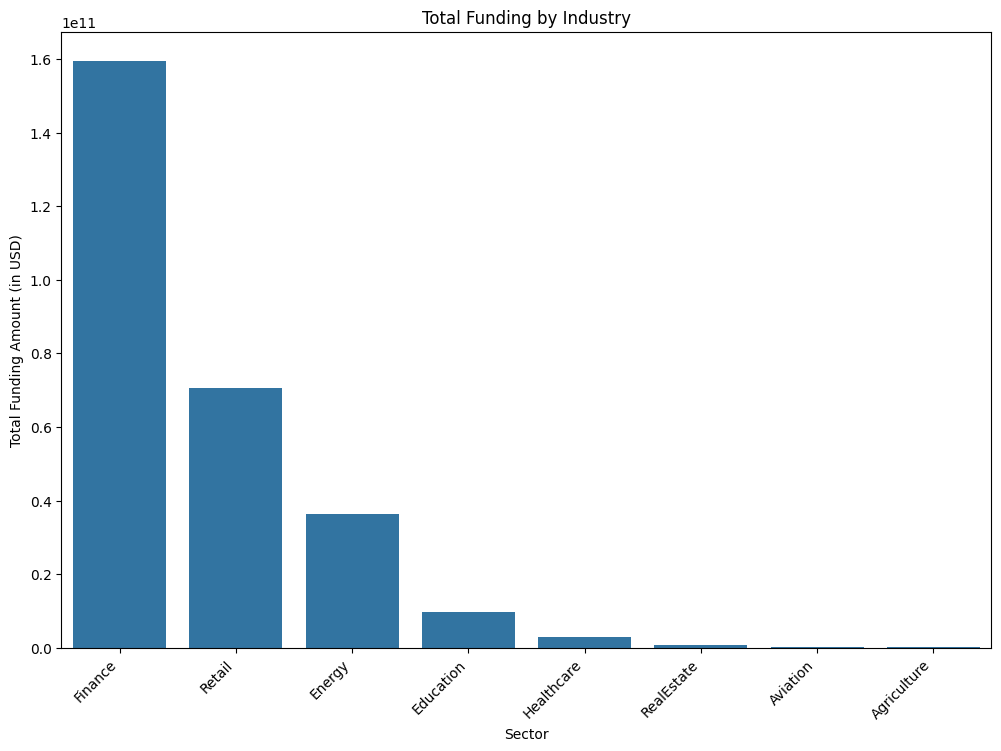

In [119]:
# Sort the DataFrame by the total funding amount for each industry in descending order
industry_total_funding = df.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(y='Amount($)', x='Sector', data=industry_total_funding)
plt.title('Total Funding by Industry')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

### ***Question 3*** - Who are the major investors in the Indian start-up ecosystem?

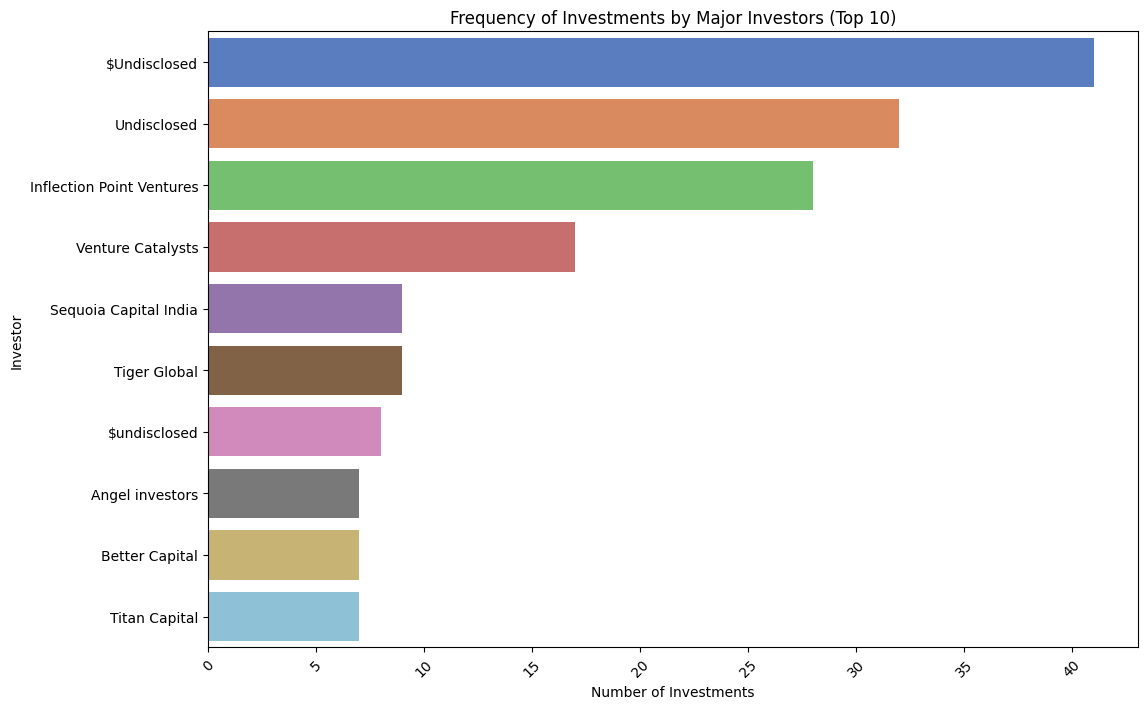

In [120]:
# Plotting the frequency of investments by investor
plt.figure(figsize=(12, 8))
sns.countplot(y='Investor', data=df, order=df['Investor'].value_counts().index[:10], palette='muted')
plt.title('Frequency of Investments by Major Investors (Top 10)')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.xticks(rotation=45)
plt.show()

### ***Question 4*** - Are there any specific cities in India that are attracting more start-ups than the others?

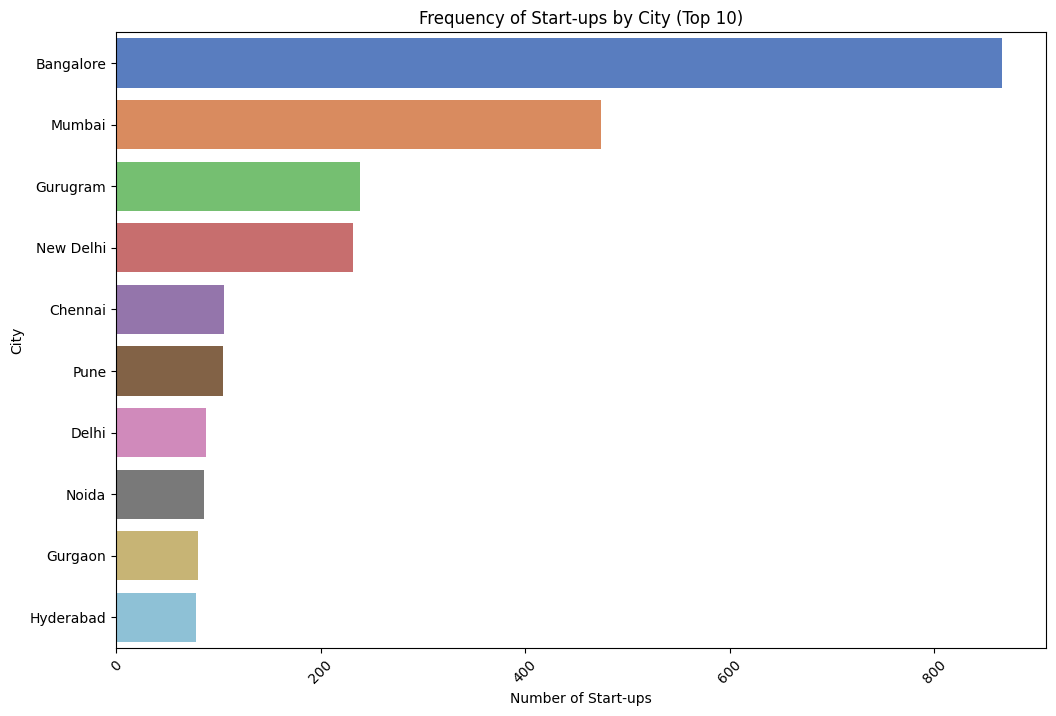

In [121]:

# Plotting the frequency of start-ups by city or region
plt.figure(figsize=(12, 8))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:10], palette='muted')
plt.title('Frequency of Start-ups by City (Top 10)')
plt.xlabel('Number of Start-ups')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

### ***Question 5*** - Which cities in India have attracted the most funding?

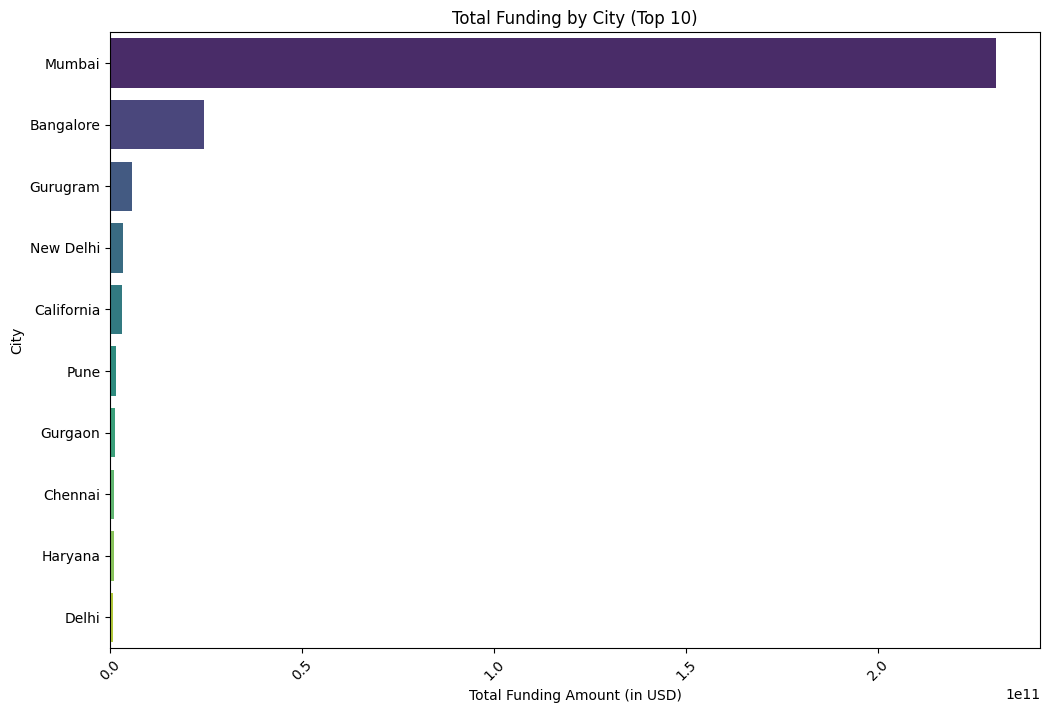

In [122]:
# Group the data by city or region and calculate the total funding amount for each
funding_by_city = df.groupby('City')['Amount($)'].sum().reset_index()

# Sort the data in descending order based on total funding amount
funding_by_city_sorted = funding_by_city.sort_values(by='Amount($)', ascending=False)

# Plotting the total funding amount by city or region
plt.figure(figsize=(12, 8))
sns.barplot(x='Amount($)', y='City', data=funding_by_city_sorted[:10], palette='viridis')
plt.title('Total Funding by City (Top 10)')
plt.xlabel('Total Funding Amount (in USD)')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

### ***Question 6*** - Which start-ups have shown the most growth in terms of funding received over the years?

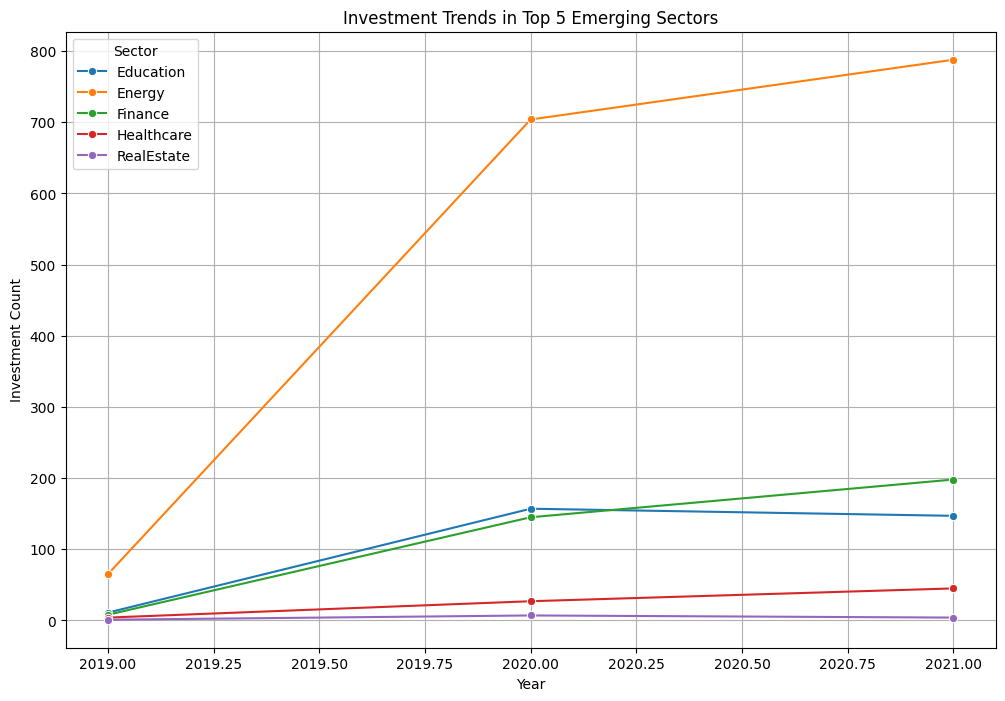

In [128]:

# Grouping the data by year and industry and counting the number of investments
investment_counts = df.groupby(['Year', 'Sector']).size().reset_index(name='Investment Count')

# Calculating the percentage change in investment counts between consecutive years for each industry
investment_counts['Percentage Change'] = investment_counts.groupby('Sector')['Investment Count'].pct_change()

# Filtering out the rows with NaN percentage change (due to no data for the previous year)
investment_counts = investment_counts.dropna()

# Getting the top 3 emerging sectors with the highest percentage change
top_emerging_sectors = investment_counts.groupby('Sector')['Percentage Change'].mean().nlargest(5).index.tolist()

# Filtering the data for the top 3 emerging sectors
emerging_sectors_data = investment_counts[investment_counts['Sector'].isin(top_emerging_sectors)]

# Plotting the investment counts over time for the top 3 emerging sectors
plt.figure(figsize=(12, 8))
sns.lineplot(data=emerging_sectors_data, x='Year', y='Investment Count', hue='Sector', marker='o')
plt.title('Investment Trends in Top 5 Emerging Sectors')
plt.xlabel('Year')
plt.ylabel('Investment Count')
plt.legend(title='Sector')
plt.grid(True)


plt.show()